<a href="https://colab.research.google.com/github/FurkyT/Global_AI_Hub_Projects/blob/main/Global_AI_Hub_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATASET DOWNLOAD

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json
!kaggle datasets download luiscorter/netflix-original-films-imdb-scores
!unzip netflix-original-films-imdb-scores

Saving kaggle.json to kaggle.json
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 8.96MB/s]
Archive:  netflix-original-films-imdb-scores.zip
  inflating: NetflixOriginals.csv    


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

## PROBLEMS

In [ ]:
nf_data = pd.read_csv('/content/NetflixOriginals.csv',encoding='latin-1')

### Problem 1 

*   Based on the dataset which languages are used for the long movies, visualize.





In [ ]:
mean_rtime = nf_data.Runtime.mean()

In [ ]:
mean_rtime

93.57705479452055

In [ ]:
idx_list =nf_data.index[nf_data['Runtime']>=(mean_rtime+15)].tolist()

In [ ]:
long_movies_df = pd.DataFrame(columns = ['Runtime','Language'])

In [ ]:
rtime = []
lng = []
for idx in idx_list:
  rtime.append(nf_data.at[nf_data.index[idx],'Runtime'])
  lng.append(nf_data.at[nf_data.index[idx],'Language'])
long_movies_df['Runtime'] = rtime
long_movies_df['Language'] = lng  

In [ ]:
# Data Frame For Problem 1 (Films which runtime is more than 110 min)
long_movies_df

In [ ]:
unique_lng = long_movies_df['Language'].unique().tolist()
n_of_lng = []
for language in unique_lng:
  n_of_lng.append(len(long_movies_df[long_movies_df['Language'].isin([language])]))

In [ ]:
# Pie Chart For Problem 1 (Films which runtime is more than 110 min)
fig = plt.figure(figsize =(15, 15))
plt.pie(n_of_lng, labels = unique_lng)
plt.show

### Problem 2 


*   Find and visualize the IMDB values ​​of the movies shot in the 'Documentary' genre between January 2019 and June 2020.







In [ ]:
#Setting the timestamp
premiereDate = nf_data.copy()
premiereDate["Premiere"] = premiereDate["Premiere"].apply(lambda x: "".join(x for x in x.replace(".",",")))
premiereDate["PremiereDate"] = premiereDate["Premiere"].apply(lambda x: datetime.strptime(x, "%B %d, %Y").date())
premiereDate["Year"] = premiereDate["Premiere"].apply(lambda x: "".join(x for x in x.replace(",","").split()[-1]))

premiereDate["PremiereDate"] = pd.to_datetime(premiereDate["PremiereDate"]) 
premiereDate

,Title,Genre,Premiere,Runtime,IMDB Score,Language,PremiereDate,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09,2015
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08,2020


In [ ]:
premiereDate = premiereDate[(premiereDate.PremiereDate.between('01-01-2019', '30-06-2020')) & (premiereDate.Genre == 'Documentary')]
premiereDate

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))

ax.bar(premiereDate.Title, premiereDate.Runtime, color ='rgb',
        width = 0.4)
plt.xticks(rotation=90)

plt.xlabel("Title of The Movies")
plt.ylabel("Runtimes")
plt.show()

### Problem 3 


*   Which genre has the highest IMDB rating among movies shot in English?





In [ ]:
obj = nf_data.iloc[nf_data[nf_data['Language'] == 'English']['IMDB Score'].idxmax()]
print(f"The movie which the language of it is Engilsh and have the hıghest IMDB score is {obj.get('Title')} and genre of the movie is {obj.get('Genre')} with the {obj.get('IMDB Score')} IMDB score.")

The movie which the language of it is Engilsh and have the hıghest IMDB score is David Attenborough: A Life on Our Planet and genre of the movie is Documentary with the 9.0 IMDB score.


### Problem 4


*   What is the average 'runtime' of movies shot in 'Hindi'?





In [ ]:
mean_hindi = nf_data[nf_data['Language'] == 'Hindi']['Runtime'].mean()
f_mean_hindi = "{:.2f}".format(mean_hindi)

print(f"Average runtime of movies which are shot in Hindi is {f_mean_hindi}.")

Average runtime of movies which are shot in Hindi is 115.79.


### Problem 5


*   How many categories does the 'Genre' Column have and what are those categories? Express it visually.






In [ ]:
genre_type_array =nf_data['Genre'].unique()
genre_type_list =genre_type_array.tolist()
genre_usage_array =nf_data['Genre'].value_counts().values
genre_usage_list =genre_usage_array.tolist()

In [ ]:
fig, ax = plt.subplots(figsize = (30,15))

ax.bar(genre_type_list, genre_usage_list, color ='rgb',
        width = 0.4)
plt.xticks(rotation=90)

plt.xlabel("Title of The Movies")
plt.ylabel("Runtimes")
plt.show()

### Problem 6

*   Find the 3 most used languages ​​in the movies in the data set.




In [ ]:
language_type_array =nf_data['Language'].unique()
language_type_list =language_type_array.tolist()
language_usage_array =nf_data['Language'].value_counts().values
language_usage_list =language_usage_array.tolist()

In [ ]:
lang_df = pd.DataFrame(columns = ['Language', 'Usage'])
lang_df['Language'] = language_type_list
lang_df['Usage'] = language_usage_list
lang_df.sort_values(by=['Usage'], ascending=False,inplace=True)
lang_list = lang_df['Language'].head(3).tolist()

print(f'1. Most used languages in movies is {lang_list[0]}\n2. Most used languages in movies is {lang_list[1]}\n3. Most used languages in movies is {lang_list[2]}\n')

1. Most used languages in movies is English/Japanese
2. Most used languages in movies is Spanish
3. Most used languages in movies is Italian



### Problem 7

*   Top 10 movies with the highest IMDB rating?





In [ ]:
nf_data.sort_values(by = ['IMDB Score'], ascending=False, inplace=True)
top_ten_title = nf_data['Title'].head(10).tolist()
top_ten_score = nf_data['IMDB Score'].head(10).tolist()
cnt = 1
for title in top_ten_list:
  print(f'{cnt}.Title: {title} --- IMDB Score: {top_ten_score[cnt-1]}')
  cnt += 1

1.Title: David Attenborough: A Life on Our Planet --- IMDB Score: 9.0
2.Title: Emicida: AmarElo - It's All For Yesterday --- IMDB Score: 8.6
3.Title: Springsteen on Broadway --- IMDB Score: 8.5
4.Title: Winter on Fire: Ukraine's Fight for Freedom --- IMDB Score: 8.4
5.Title: Taylor Swift: Reputation Stadium Tour --- IMDB Score: 8.4
6.Title: Ben Platt: Live from Radio City Music Hall --- IMDB Score: 8.4
7.Title: Dancing with the Birds --- IMDB Score: 8.3
8.Title: Cuba and the Cameraman  --- IMDB Score: 8.3
9.Title: Disclosure: Trans Lives on Screen --- IMDB Score: 8.2
10.Title: Klaus --- IMDB Score: 8.2


### Problem 8
*   What is the correlation between IMDB score and 'Runtime'? Examine and visualize.


  Correlation coefficient r meanings: 

  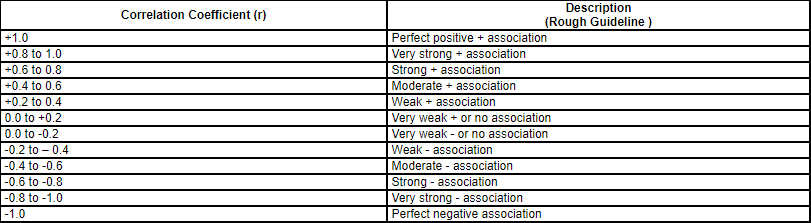

Resource : https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html#:~:text=The%20sample%20correlation%20coefficient%20(r,for%20accumulated%20saving%20over%20time.

In [ ]:
nf_data.reset_index(drop=True)
correlation = nf_data.corr()
print(f'Correlation between Runtime and IMDB Score is {correlation["Runtime"][1]} so it means either there is no association between these two value or they have very weak association\n')
print(f'Correlation between IMDB Score and Runtime is {correlation["IMDB Score"][0]} so it means either there is no association between these two value or they have very weak association\n') 
      

Correlation between Runtime and IMDB Score is -0.040896291420788745 so it means either there is no association between these two value or they have very weak association

Correlation between IMDB Score and Runtime is -0.040896291420788745 so it means either there is no association between these two value or they have very weak association



### Problem 9

*   Which are the top 10 'Genre' with the highest IMDB Score? Visualize it.





In [ ]:
genre_group = nf_data.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(['IMDB Score'], ascending=False).reset_index()
top_ten_genre = genre_group.head(10)
top_ten_genre

,Genre,IMDB Score
0,Documentary,9.0
1,One-man show,8.5
2,Concert Film,8.4
3,Animation/Christmas/Comedy/Adventure,8.2
4,Drama,7.9
5,Animation / Short,7.8
6,Crime drama,7.8
7,Musical / Short,7.7
8,Making-of,7.7
9,War drama,7.7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


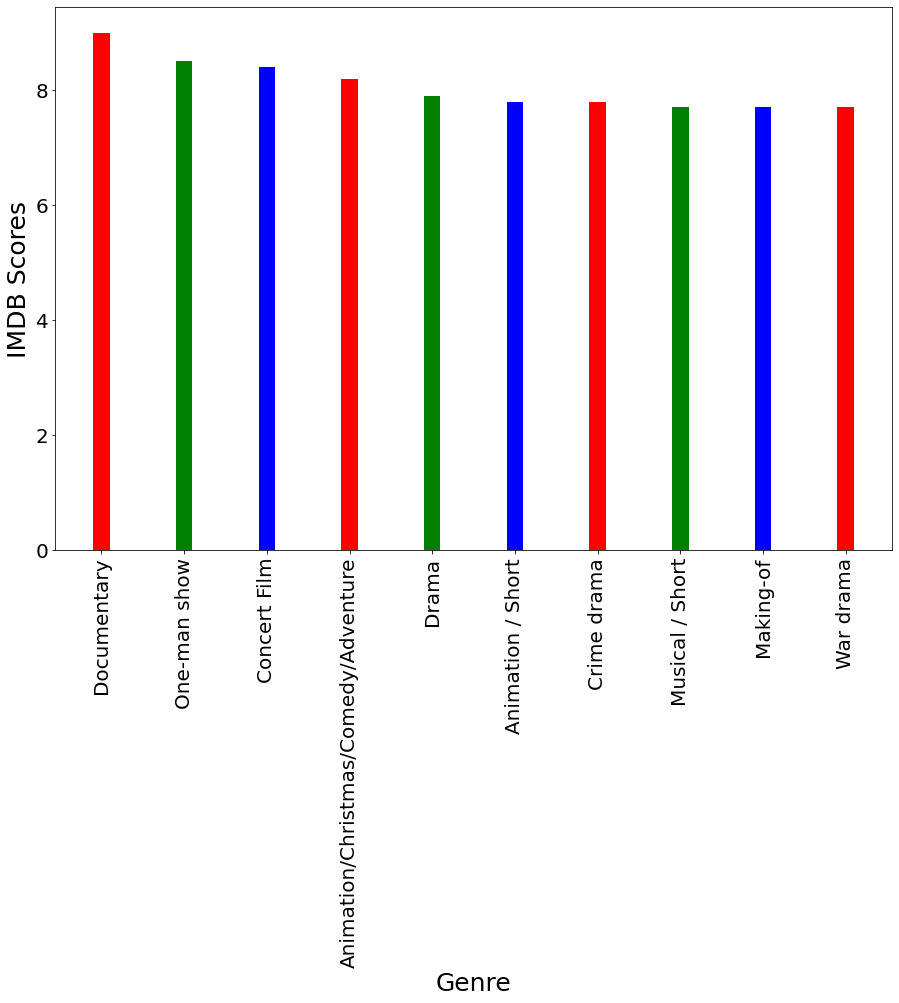

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))

ax.bar(top_ten_genre['Genre'], top_ten_genre['IMDB Score'], color ='rgb',
        width = 0.2)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

ax.set_xlabel('Genre', fontsize=25)
ax.set_ylabel('IMDB Scores', fontsize=25)

plt.show()

### Problem 10


*   What are the top 10 movies with the highest 'runtime'? Visualize it.



In [ ]:
runtime_sort_df = nf_data.sort_values(by = 'Runtime', ascending=False).reset_index()
runtime_sort_df

,index,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
1,328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
2,581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
3,247,Citation,Drama,"November 6, 2020",151,6.2,English
4,284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
...,...,...,...,...,...,...,...
579,498,Zion,Documentary,"August 10, 2018",11,7.2,English
580,66,American Factory: A Conversation with the Obamas,Aftershow / Interview,"August 21, 2019",10,5.2,English
581,325,Canvas,Animation / Short,"December 11, 2020",9,6.5,English
582,417,Cops and Robbers,Animation / Short,"December 28, 2020",7,6.9,English


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


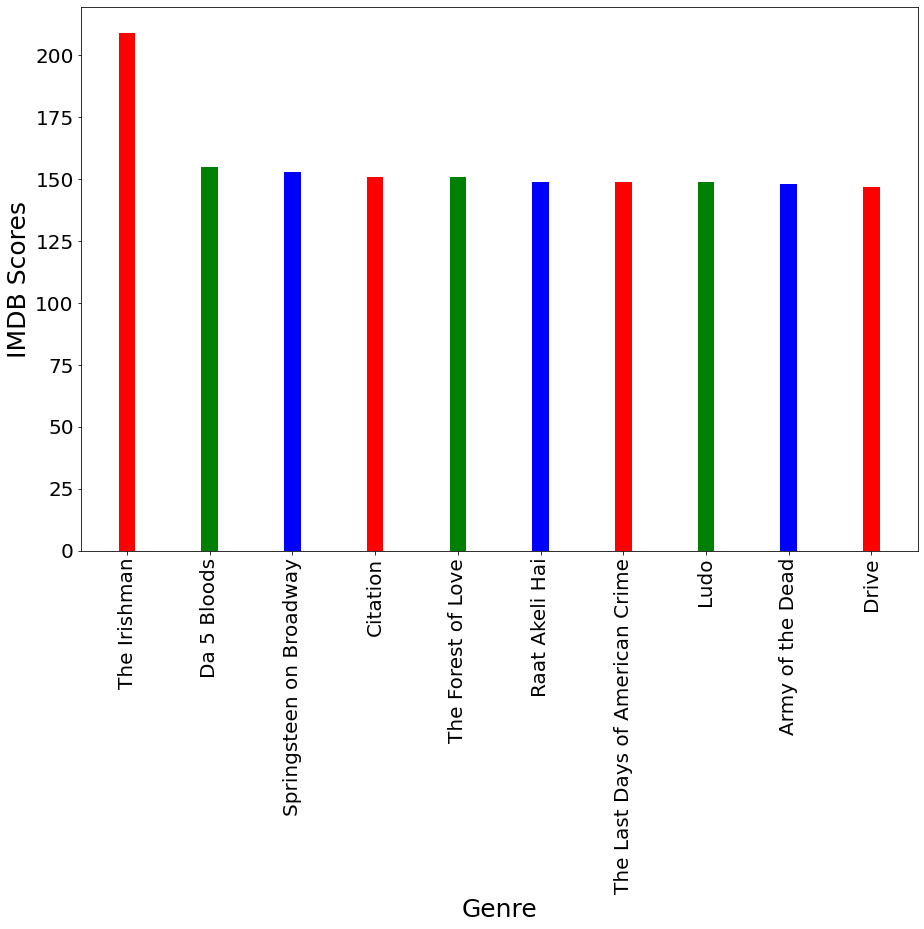

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.bar(runtime_sort_df['Title'].head(10), runtime_sort_df['Runtime'].head(10), color ='rgb',
        width = 0.2)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

ax.set_xlabel('Genre', fontsize=25)
ax.set_ylabel('IMDB Scores', fontsize=25)

plt.show()

### Problem 11


*   In which year was the most movies released? Visualize it.


In [ ]:
most_movie_year = premiereDate['Year'].value_counts().idxmax()
most_movie_year_count = premiereDate['Year'].value_counts().max()

print(f'Most movie released on {most_movie_year} and number of released movies is {most_movie_year_count}')

Most movie released on 2020 and number of released movies is 183


### Problem 12



*   
Which language movies have the lowest average IMBD ratings? Visualize it.





In [ ]:
language_group = nf_data.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(['IMDB Score'], ascending=True).reset_index()
language_group_first_ten = language_group.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


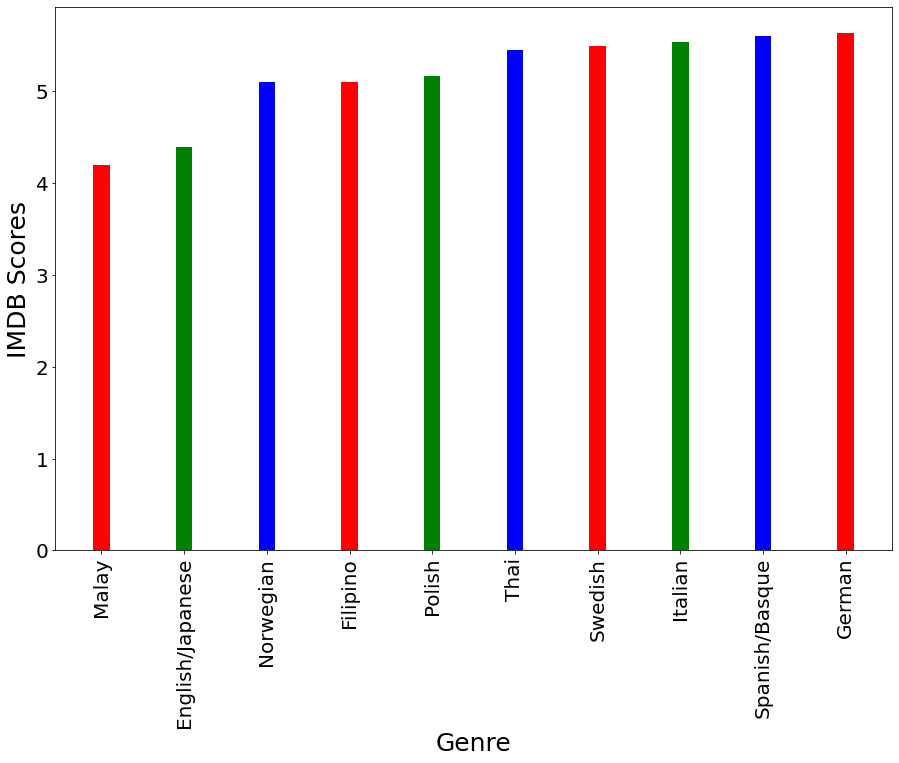

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))

ax.bar(language_group_first_ten['Language'], language_group_first_ten['IMDB Score'], color ='rgb',
        width = 0.2)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)

ax.set_xlabel('Genre', fontsize=25)
ax.set_ylabel('IMDB Scores', fontsize=25)

plt.show()

### Problem 13


*   Which year has the greatest total runtime?


In [ ]:
total_runtime_premiere = premiereDate[["Runtime","Year"]].groupby("Year").sum().sort_values(by='Runtime',ascending=False).reset_index()
total_runtime_premiere_year = total_runtime_premiere['Year'][0]
total_runtime_premiere_runtime = total_runtime_premiere['Runtime'][0]

print(f'Greatest runtime year is {total_runtime_premiere_year} and total runtime is {total_runtime_premiere_runtime}')

Greatest runtime year is 2020 and total runtime is 17384



### Problem 14

*   
What is the "Genre" where each language is used the most?


In [81]:
genre_language_df = nf_data.groupby(["Language"])["Genre"].value_counts().groupby(level='Language').head(1).sort_values(ascending=False)
genre_language_df


pandas.core.series.Series

### Problem 15


*   Is there any outlier data in the data set? Please explain.



Text(0.5, 1.0, 'IMDB Score')

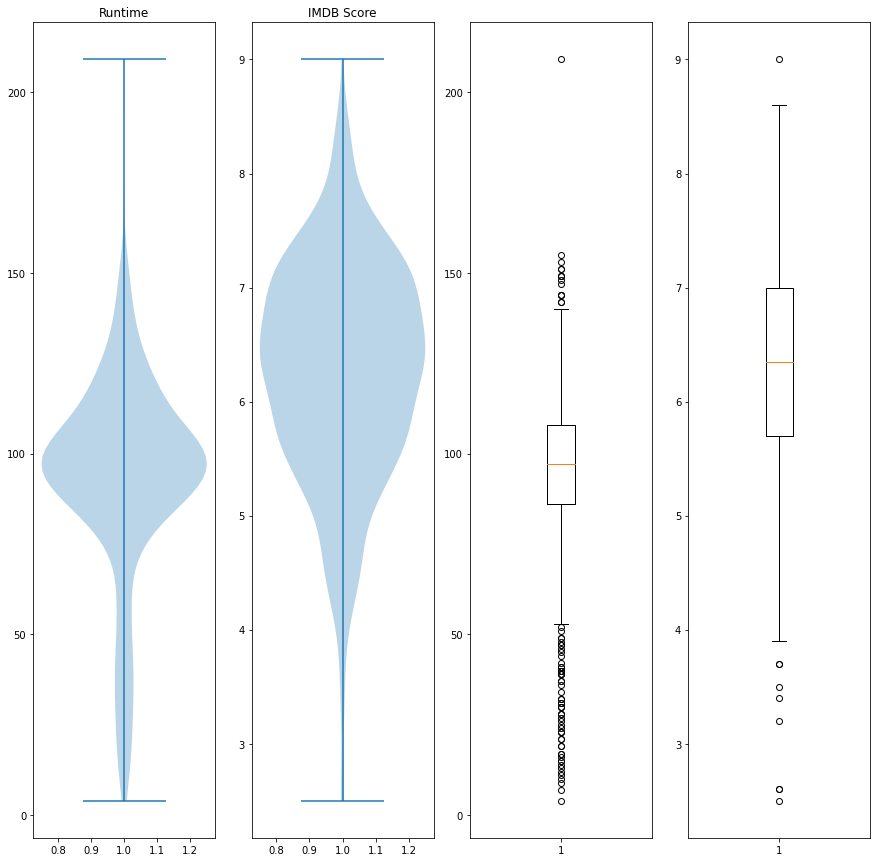

In [88]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize = (15,15))

ax1.violinplot(nf_data.Runtime, showextrema= True)
ax1.set_title('Runtime')
ax2.violinplot(nf_data['IMDB Score'], showextrema= True)
ax2.set_title('IMDB Score')
ax3.boxplot(nf_data.Runtime)
ax1.set_title('Runtime')
ax4.boxplot(nf_data['IMDB Score'])
ax2.set_title('IMDB Score')

From the graphics above we can see the distrubition of values clearly on violin plot and the outliers on boxplot for runtime and IMDB score on the data.